In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr, kendalltau, pointbiserialr

In [6]:
print("TRAIN DATA")
train_data = pd.read_csv("data/train.csv")
print(train_data.head())

print("\nNEW TRAIN DATA")
train_data_new = pd.read_csv("data/train_new.csv")
print(train_data_new.head())

print("\nTEST DATA")
test_data = pd.read_csv('data/test.csv')
print(test_data.head())

TRAIN DATA
   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087   

         Y1        Y2  
0 -0.935902 -0.310081  
1 -

I am going to merge the train data + train data new where there are two additional columns


In [11]:
# Merge the datasets
merged_data = pd.concat([train_data, train_data_new], axis=0)

columns = [col for col in merged_data.columns if col not in ['Y1', 'Y2']] + ['Y1', 'Y2']
merged_data = merged_data[columns]
merged_data = merged_data.set_index("time")
print(merged_data.head())
merged_data.to_csv("full_train_data.csv")

             A         B         C         D         E         F         G  \
time                                                                         
0.0   0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1.0   0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2.0  -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3.0   0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4.0   0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

             H         I         J         K         L         M         N  \
time                                                                         
0.0  -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1.0   0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2.0   0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3.0   1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.54899

Now I will plot the scatter plots of all features with Y1

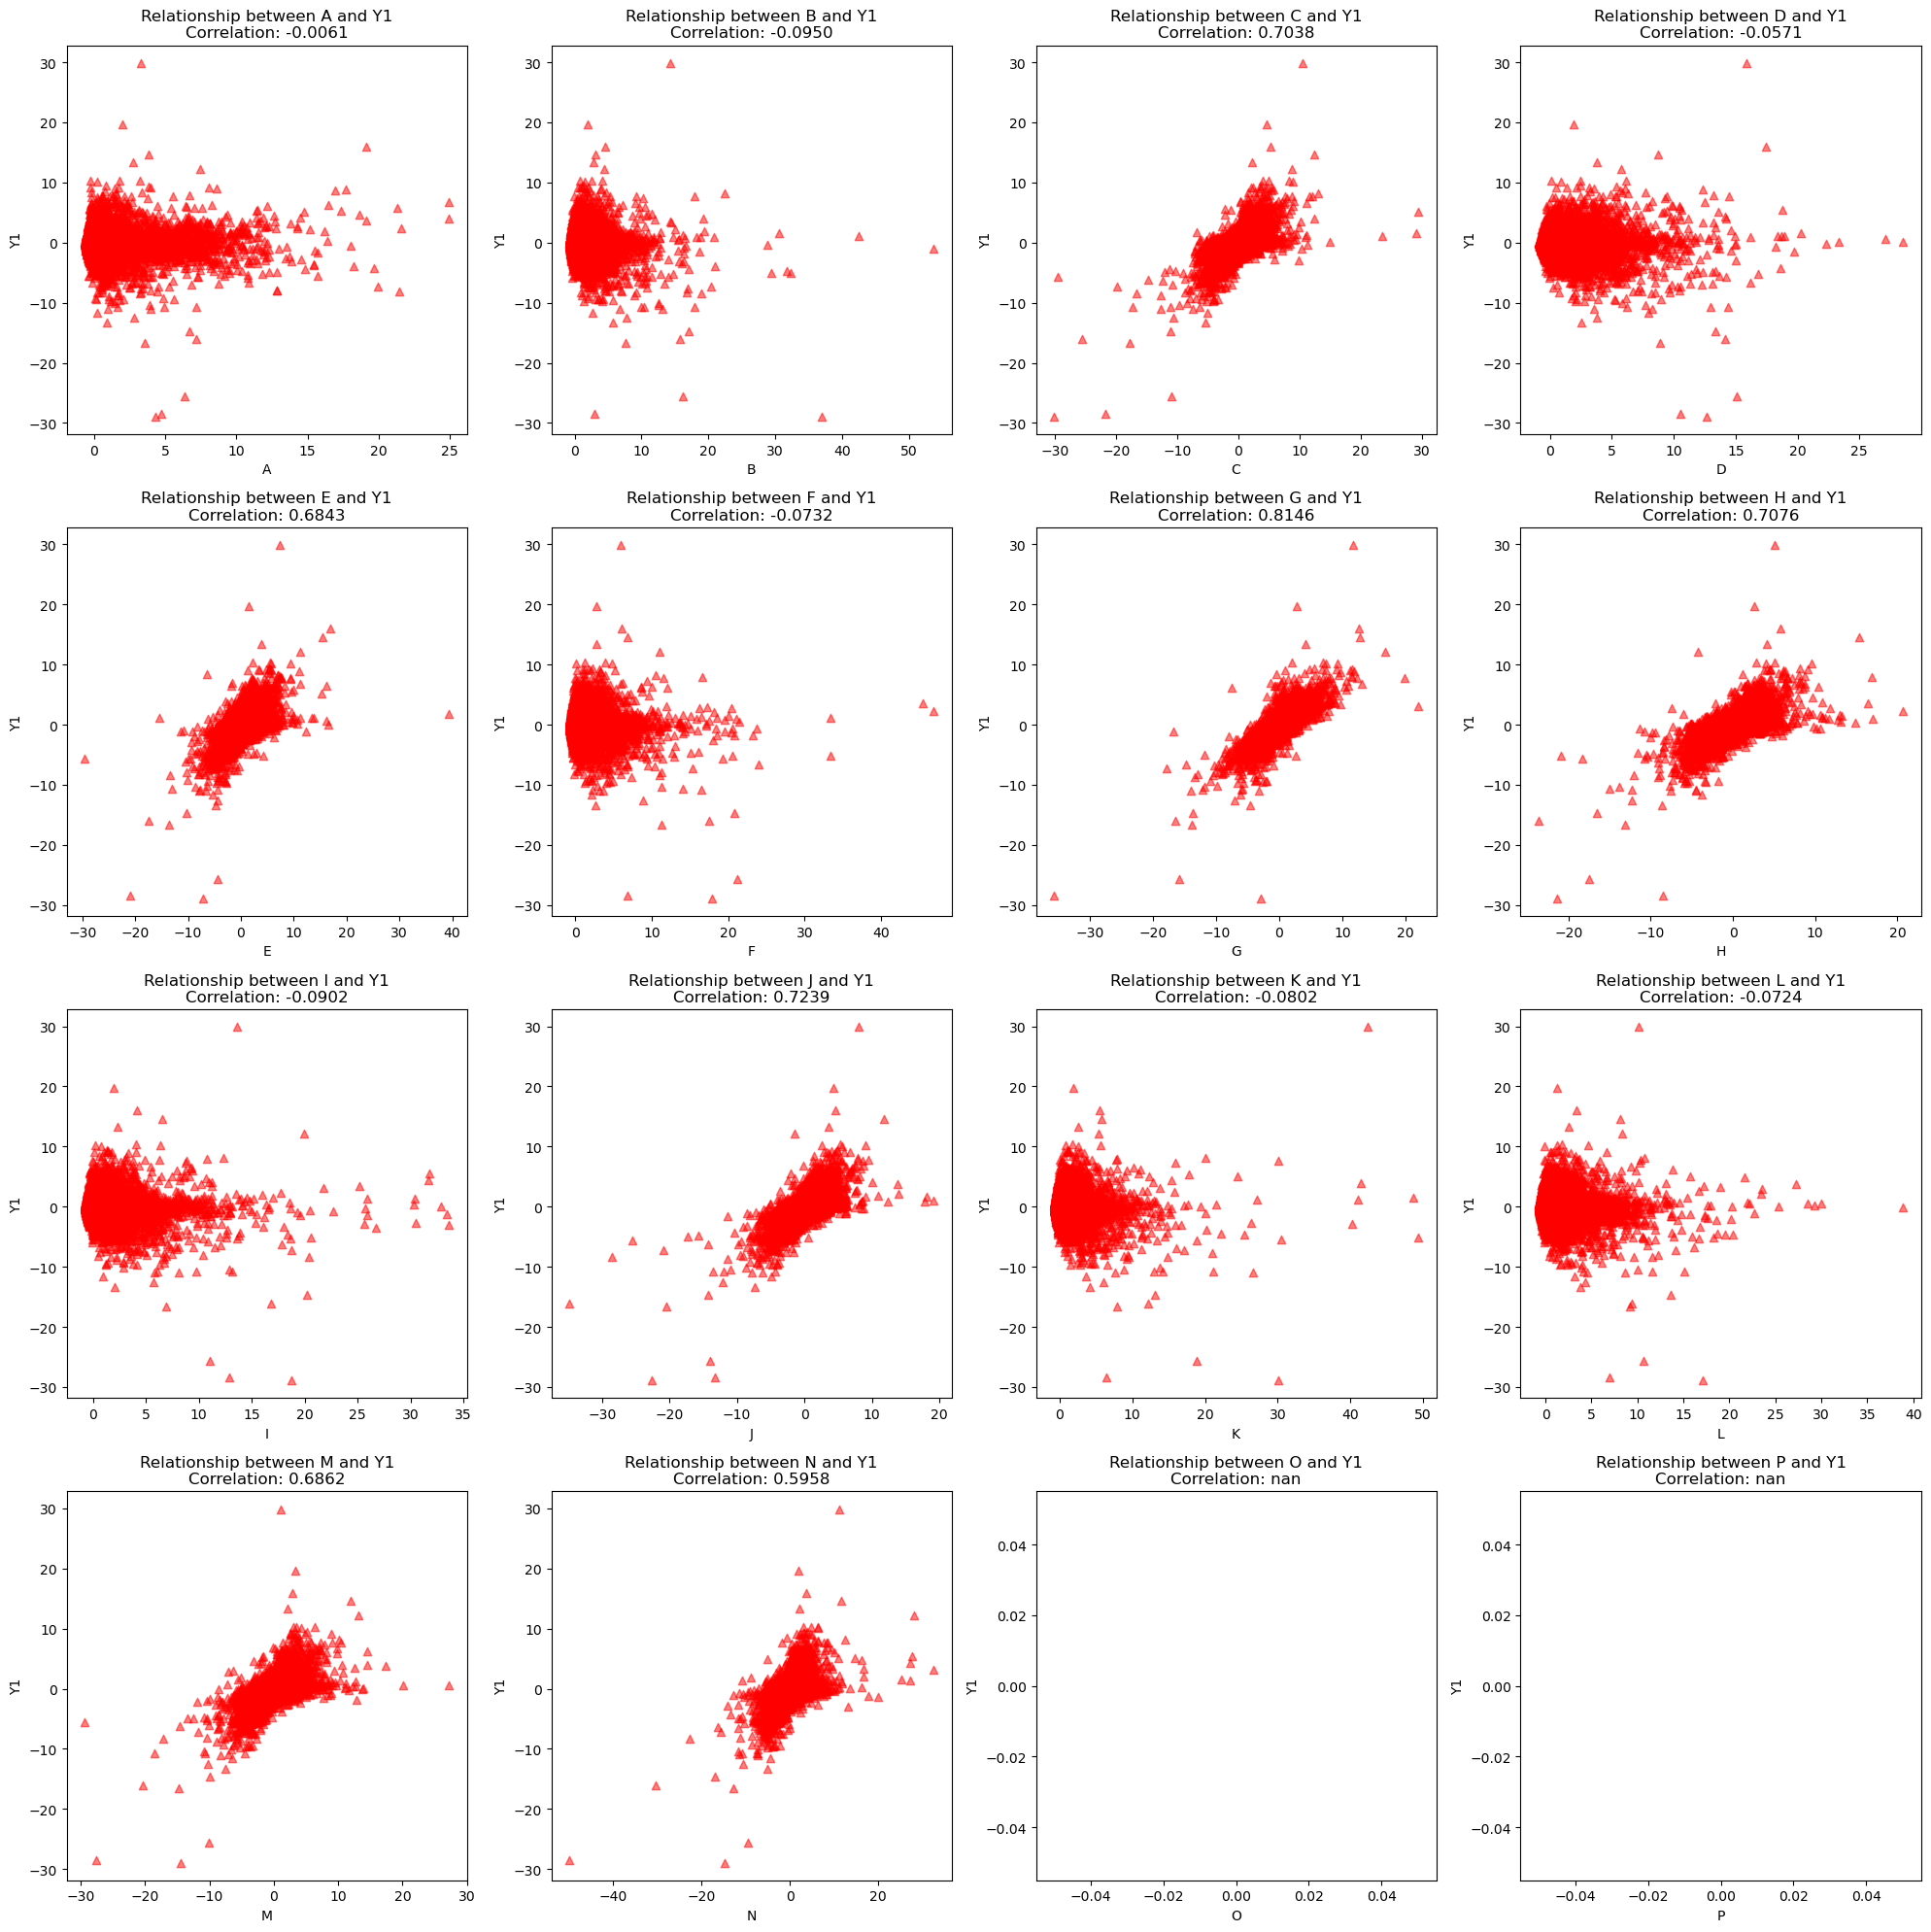

In [23]:
# Define the columns to plot
columns_to_plot = [col for col in columns if col not in ['time', 'Y1', 'Y2']]

# Set up the grid for subplots
num_cols = 4  # Number of columns in the grid
num_rows = -(-len(columns_to_plot) // num_cols)  # Calculate rows needed (ceiling division)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Create scatter plots for each column and compute correlation with Y1
correlation_dict_Y1 = {}
for i, col in enumerate(columns_to_plot):
    correlation = merged_data[col].corr(merged_data['Y1'])
    axes[i].scatter(merged_data[col], merged_data['Y1'], alpha=0.5, color="red", marker="^")
    axes[i].set_title(f'Relationship between {col} and Y1\nCorrelation: {correlation:.4f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Y1')
    correlation_dict_Y1[f"{col}"] = correlation

# Remove empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now scatter plots with Y2

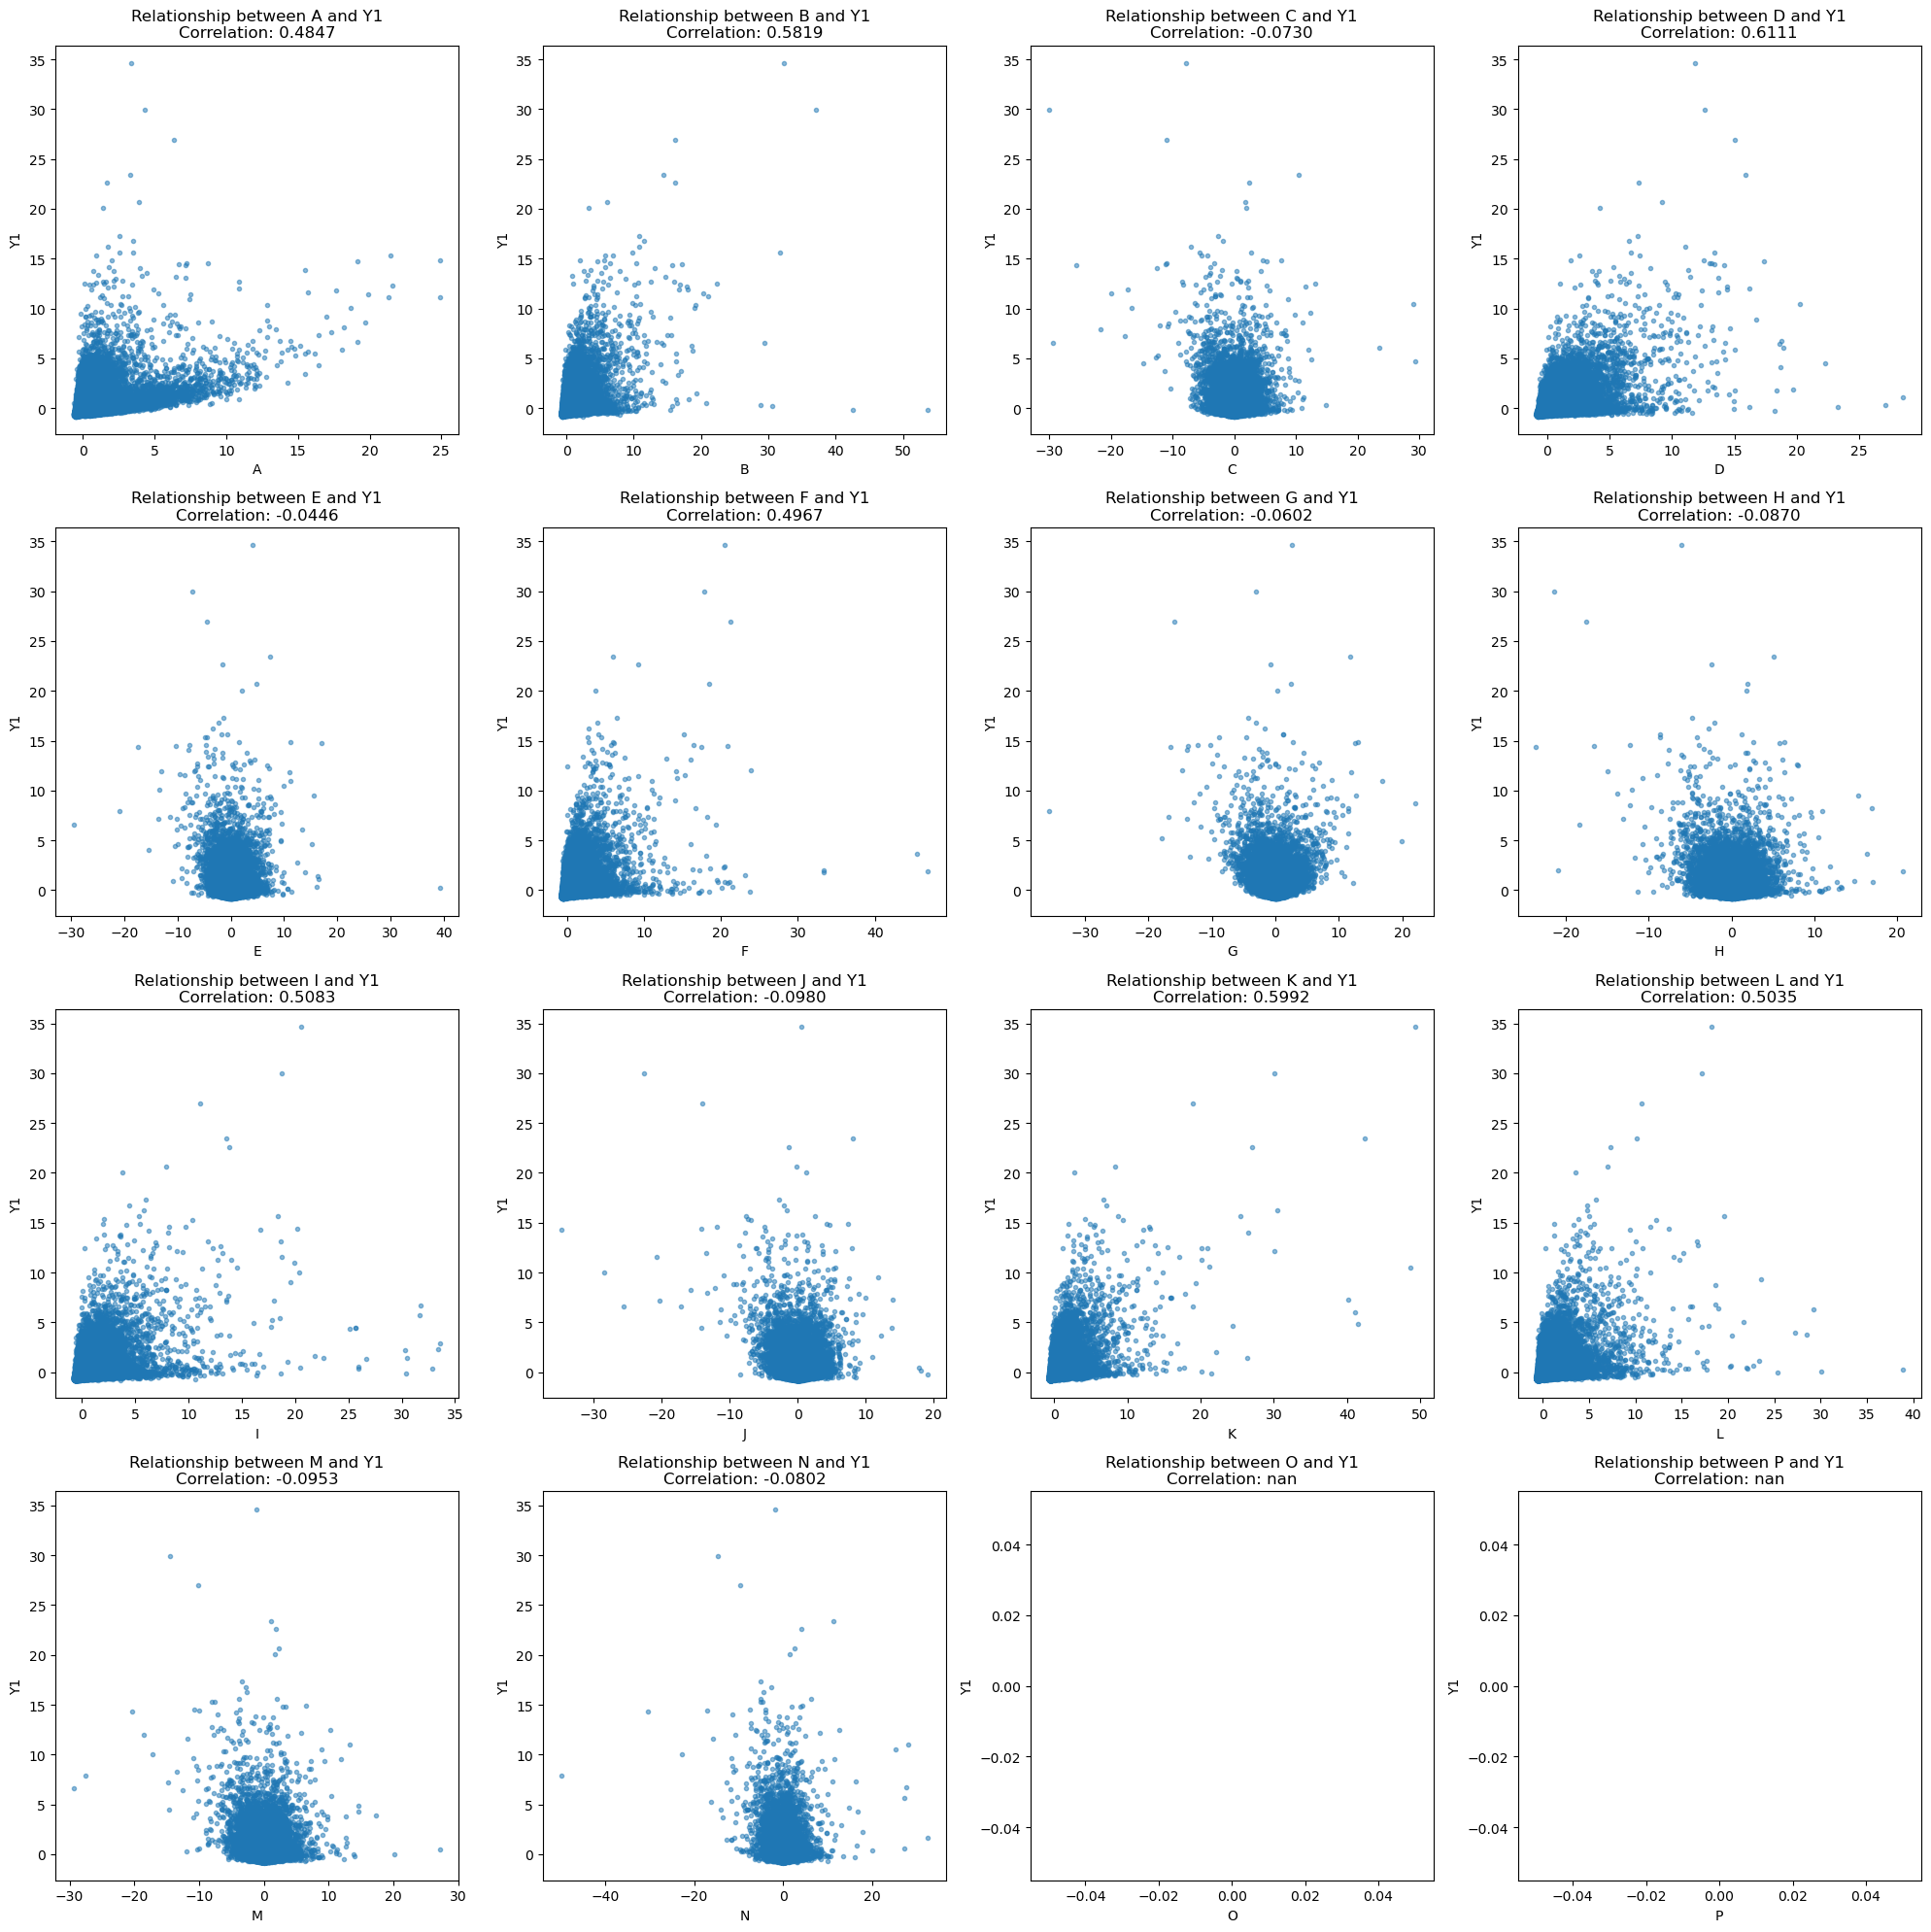

In [24]:
# Define the columns to plot
columns_to_plot = [col for col in columns if col not in ['time', 'Y1', 'Y2']]

# Set up the grid for subplots
num_cols = 4  # Number of columns in the grid
num_rows = -(-len(columns_to_plot) // num_cols)  # Calculate rows needed (ceiling division)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

# Create scatter plots for each column and compute correlation with Y1
correlation_dict_Y2 = {}
for i, col in enumerate(columns_to_plot):
    correlation = merged_data[col].corr(merged_data['Y2'])
    axes[i].scatter(merged_data[col], merged_data['Y2'], alpha=0.5, marker=".")
    axes[i].set_title(f'Relationship between {col} and Y1\nCorrelation: {correlation:.4f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Y1')
    correlation_dict_Y2[f"{col}"] = correlation

# Remove empty subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Pearson correlations computation (linear)

In [31]:
# Build the correlation dataframe (explicit Series for clarity)
correlation_df = pd.DataFrame({
    'Correlation Y1': pd.Series(correlation_dict_Y1, dtype=float),
    'Correlation Y2': pd.Series(correlation_dict_Y2, dtype=float),
})

# Optional: replace NaNs (e.g., when a feature lacks a correlation in one dict)
correlation_df = correlation_df.fillna(0.0)

# Helpful derived columns
correlation_df['abs_Y1'] = correlation_df['Correlation Y1'].abs()
correlation_df['abs_Y2'] = correlation_df['Correlation Y2'].abs()

# Combined strength (L2 norm of the two correlation coefficients)
correlation_df['score_l2'] = np.hypot(
    correlation_df['Correlation Y1'],
    correlation_df['Correlation Y2']
)

# Other combined scorings (pick the one you like)
correlation_df['score_max'] = correlation_df[['abs_Y1', 'abs_Y2']].max(axis=1)
correlation_df['score_mean'] = correlation_df[['abs_Y1', 'abs_Y2']].mean(axis=1)

# 1) Best features for Y1 (by absolute correlation with Y1)
top_by_Y1 = correlation_df.sort_values('abs_Y1', ascending=False)

# 2) Best features for Y2 (by absolute correlation with Y2)
top_by_Y2 = correlation_df.sort_values('abs_Y2', ascending=False)

# 3) Best overall considering both targets (L2 norm)
top_by_both = correlation_df.sort_values('score_l2', ascending=False)

# Show results
print("Top by both (L2):")
print(top_by_both.head(20))

Top by both (L2):
   Correlation Y1  Correlation Y2    abs_Y1    abs_Y2  score_l2  score_max  \
G        0.814568       -0.060187  0.814568  0.060187  0.816788   0.814568   
J        0.723921       -0.097986  0.723921  0.097986  0.730522   0.723921   
H        0.707560       -0.086976  0.707560  0.086976  0.712885   0.707560   
C        0.703823       -0.073009  0.703823  0.073009  0.707599   0.703823   
M        0.686246       -0.095326  0.686246  0.095326  0.692835   0.686246   
E        0.684297       -0.044583  0.684297  0.044583  0.685748   0.684297   
D       -0.057097        0.611063  0.057097  0.611063  0.613725   0.611063   
K       -0.080196        0.599183  0.080196  0.599183  0.604526   0.599183   
N        0.595766       -0.080172  0.595766  0.080172  0.601137   0.595766   
B       -0.094995        0.581859  0.094995  0.581859  0.589563   0.581859   
I       -0.090226        0.508347  0.090226  0.508347  0.516292   0.508347   
L       -0.072366        0.503546  0.072366  0


Non-linear correlation options and feature ranking:

Many feature–target relations in the scatter plots look non-linear, so Pearson (linear) correlation can miss signal. Alternatives:
- Spearman's rho: rank-based; captures monotonic but non-linear relationships.
- Kendall's tau: rank-based; more robust to outliers but slower on large data.
- Mutual information (MI): model-free dependency measure; captures arbitrary non-linear relations (non-negative).
- Distance correlation / MIC (optional): require extra packages (e.g., `dcor`, `minepy`), useful for complex dependencies.

Below we compute Spearman, Kendall, and MI for each feature vs `Y1` and `Y2`, then rank features by these scores.

In [45]:
# Prepare X (features) and y1, y2
feature_cols = [c for c in merged_data.columns if c not in ['Y1', 'Y2']]
X = merged_data[feature_cols]
y1 = merged_data['Y1']
y2 = merged_data['Y2']

# Helper: safe rank correlations column-wise
def rank_corr_series(X_col, y, method):
    # Drop NaNs pairwise to avoid propagation
    m = X_col.notna() & y.notna()
    if m.sum() < 3:
        return np.nan
    if method == 'spearman':
        rho, _ = spearmanr(X_col[m], y[m])
        return rho
    elif method == 'kendall':
        tau, _ = kendalltau(X_col[m], y[m])
        return tau
    else:
        raise ValueError('method must be spearman or kendall')

# Spearman and Kendall for all features
spearman_y1 = {c: rank_corr_series(X[c], y1, 'spearman') for c in feature_cols}
spearman_y2 = {c: rank_corr_series(X[c], y2, 'spearman') for c in feature_cols}
kendall_y1 = {c: rank_corr_series(X[c], y1, 'kendall') for c in feature_cols}
kendall_y2 = {c: rank_corr_series(X[c], y2, 'kendall') for c in feature_cols}

# Mutual Information (MI): requires numeric inputs; fill remaining NaNs to avoid failure
X_num = X.select_dtypes(include=['number']).copy()
# Minimal imputation (median) just for MI computation
X_num = X_num.fillna(X_num.median(numeric_only=True))
y1_filled = y1.fillna(y1.median())
y2_filled = y2.fillna(y2.median())

mi_y1 = mutual_info_regression(X_num.values, y1_filled.values, random_state=0)
mi_y2 = mutual_info_regression(X_num.values, y2_filled.values, random_state=0)
mi_y1 = pd.Series(mi_y1, index=X_num.columns)
mi_y2 = pd.Series(mi_y2, index=X_num.columns)

# Assemble results into a DataFrame
nl_df = pd.DataFrame({
    'spearman_Y1': pd.Series(spearman_y1),
    'spearman_Y2': pd.Series(spearman_y2),
    'kendall_Y1': pd.Series(kendall_y1),
    'kendall_Y2': pd.Series(kendall_y2),
}).fillna(0.0)

# Insert MI columns (only for numeric features) and fill others with 0
nl_df['MI_Y1'] = 0.0
nl_df['MI_Y2'] = 0.0
for col in X_num.columns:
    nl_df.loc[col, 'MI_Y1'] = mi_y1[col]
    nl_df.loc[col, 'MI_Y2'] = mi_y2[col]

# Build combined ranking scores
nl_df['rank_strength_Y1'] = nl_df['spearman_Y1'].abs().rank(ascending=False, method='average')
nl_df['rank_strength_Y2'] = nl_df['spearman_Y2'].abs().rank(ascending=False, method='average')
nl_df['rank_MI_Y1'] = nl_df['MI_Y1'].rank(ascending=False, method='average')
nl_df['rank_MI_Y2'] = nl_df['MI_Y2'].rank(ascending=False, method='average')
nl_df['rank_overall'] = (nl_df['rank_strength_Y1'] + nl_df['rank_MI_Y1'] + nl_df['rank_strength_Y2'] + nl_df['rank_MI_Y2']) / 4.0
print("CORRELATIONS WITH RANKING")
print(nl_df)

# Sort views
top_spearman_Y1 = nl_df.sort_values('spearman_Y1', key=lambda s: s.abs(), ascending=False).head(20)
top_spearman_Y2 = nl_df.sort_values('spearman_Y2', key=lambda s: s.abs(), ascending=False).head(20)
top_mi_Y1 = nl_df.sort_values('MI_Y1', ascending=False).head(20)
top_mi_Y2 = nl_df.sort_values('MI_Y2', ascending=False).head(20)
top_overall = nl_df.sort_values('rank_overall').head(20)

print('\nTop Spearman (Y1):')
print(top_spearman_Y1[['spearman_Y1']])
print('\nTop Spearman (Y2):')
print(top_spearman_Y2[['spearman_Y2']])
print('\nTop Mutual Information (Y1):')
print(top_mi_Y1[['MI_Y1']])
print('\nTop Mutual Information (Y2):')
print(top_mi_Y2[['MI_Y2']])
print('\nTop Overall (avg rank of Spearman & MI for Y1 and Y2):')
print(top_overall[['spearman_Y1','spearman_Y2','MI_Y1','MI_Y2','rank_overall']])

CORRELATIONS WITH RANKING
   spearman_Y1  spearman_Y2  kendall_Y1  kendall_Y2     MI_Y1     MI_Y2  \
A    -0.002308     0.609209   -0.001380    0.437095  0.683004  0.810126   
B    -0.021435     0.623620   -0.013819    0.444648  0.705390  0.790324   
C     0.695609    -0.009630    0.522716   -0.006401  0.865315  0.707498   
D    -0.016948     0.612065   -0.011279    0.436902  0.707175  0.788769   
E     0.701260    -0.016222    0.525910   -0.010912  0.863304  0.702314   
F    -0.017817     0.552540   -0.011680    0.386272  0.681721  0.754267   
G     0.799796    -0.013841    0.626371   -0.008897  0.980795  0.740529   
H     0.688736    -0.011421    0.515521   -0.007237  0.856957  0.703523   
I    -0.032693     0.543824   -0.021512    0.383478  0.685236  0.755300   
J     0.709836    -0.013284    0.535390   -0.009122  0.876375  0.708845   
K    -0.024321     0.626156   -0.016160    0.447307  0.700374  0.792647   
L    -0.023044     0.561443   -0.015128    0.393667  0.689568  0.756063   

Now compute the histograms deleting the outlier to see distributions better

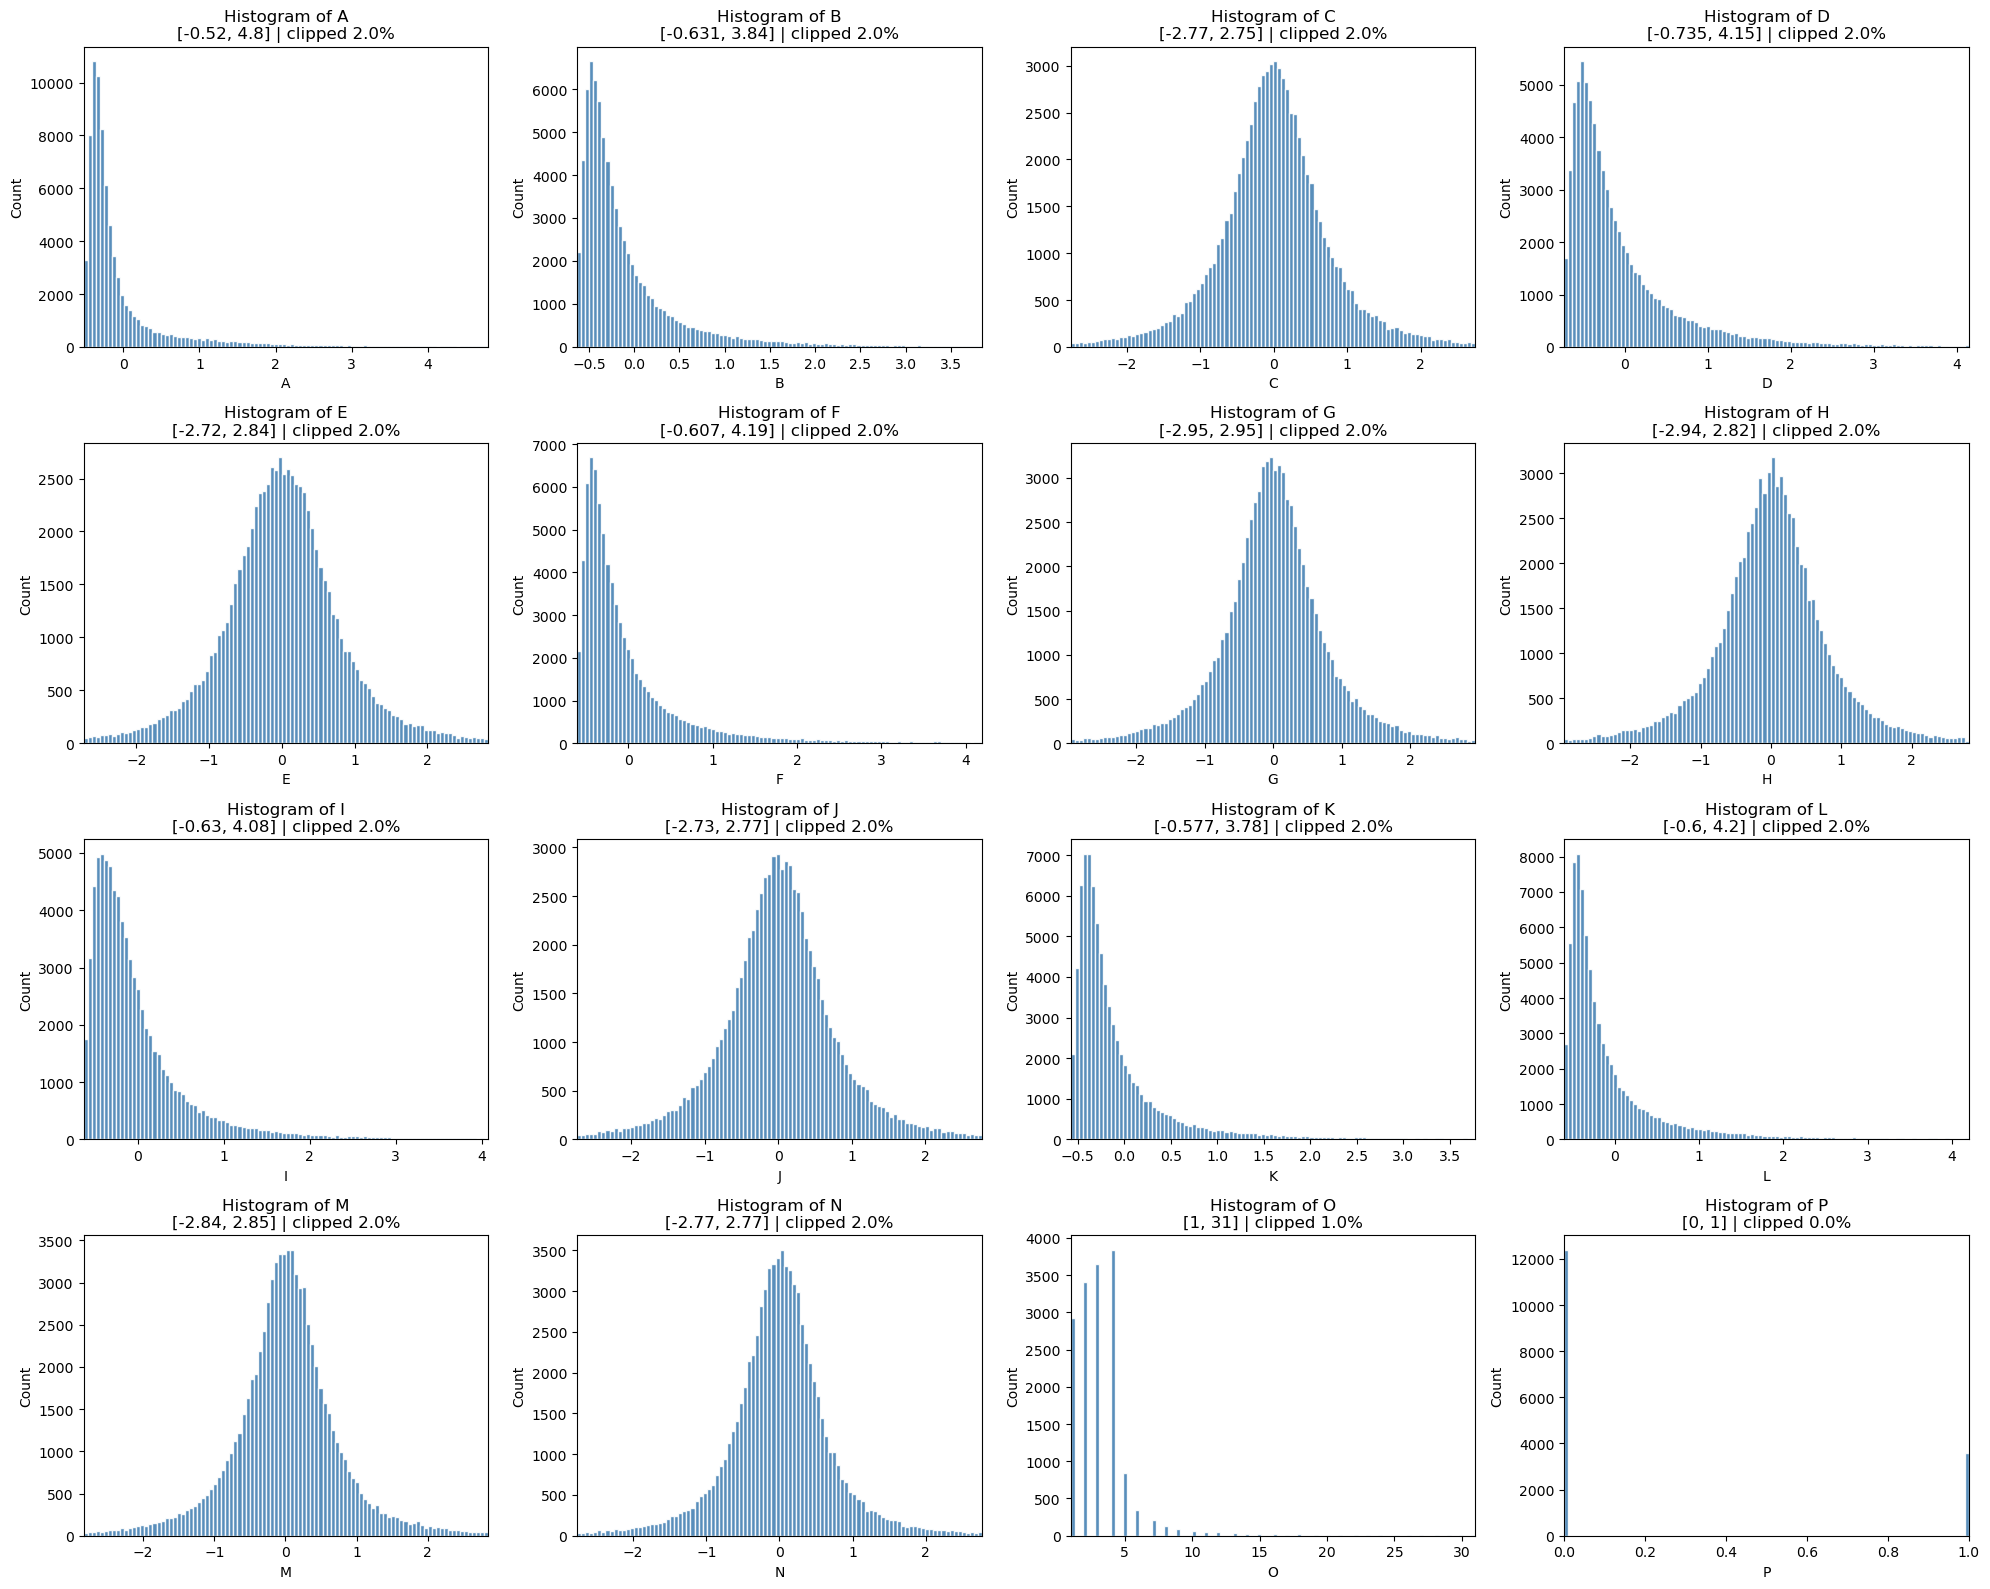

In [52]:
feature_cols = [c for c in merged_data.columns if c not in ['Y1','Y2']]
n = len(feature_cols)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Parameters you can tune
bins = 100                 # number of histogram bins
clip_mode = 'quantile'     # 'quantile' or 'iqr'
q_low, q_high = 0.01, 0.99 # keep central 98% by default
iqr_k = 1.5                # Tukey rule multiplier if using 'iqr'

for i, col in enumerate(feature_cols):
    ax = axes[i]
    # Coerce to numeric in case of mixed types; drop NaNs
    s = pd.to_numeric(merged_data[col], errors='coerce').dropna()
    if s.empty:
        ax.set_visible(False)
        continue
    # Determine clipping bounds
    if clip_mode == 'quantile':
        low, high = s.quantile(q_low), s.quantile(q_high)
    else:
        q1, q3 = s.quantile(0.25), s.quantile(0.75)
        iqr = q3 - q1
        low, high = q1 - iqr_k * iqr, q3 + iqr_k * iqr
    s_clipped = s[(s >= low) & (s <= high)]
    clipped_pct = 0.0 if len(s) == 0 else 100.0 * (1.0 - len(s_clipped) / len(s))
    ax.hist(s_clipped, bins=bins, color='steelblue', alpha=0.9, edgecolor='white')
    ax.set_title(f'Histogram of {col}\n[{low:.3g}, {high:.3g}] | clipped {clipped_pct:.1f}%')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xlim(low, high)
    # Uncomment to see tails while keeping readability:
    # ax.set_yscale('log')

# Remove any unused subplots
used = len(feature_cols)
for j in range(used, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Phi coefficient and point-biserial correlation

- Phi (ϕ) is the Pearson correlation applied to two binary variables (equivalent to the Matthews correlation coefficient for binary).
- Use it when both the feature and the target are binary. If the target is continuous (like `Y1`/`Y2`), you need to binarize it first (e.g., by thresholding).
- Point-biserial correlation is the Pearson correlation between a binary variable and a continuous variable (more appropriate when the feature is binary and the target is continuous).
- Below we compute:
  1) Phi between binary features and binarized targets, and
  2) Point-biserial between binary features and continuous `Y1`/`Y2`.

TOTALLY CODE TO FIX, NOT FINISHED PHI


In [44]:
# Phi coefficient (binary vs binary) and Point-Biserial (binary vs continuous)
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr

# Try importing phi from the 'phi' package; if unavailable, fall back to manual calc
def phi_coefficient_from_table(a, b, c, d):
    # Contingency table: [[a, b], [c, d]] with totals > 0
    num = (a * d) - (b * c)
    denom = np.sqrt((a + b) * (c + d) * (a + c) * (b + d))
    return np.nan if denom == 0 else num / denom

def phi_coefficient_binary(x, y):
    # x, y are binary arrays/Series with values {0,1} (after dropping NaNs pairwise)
    m = x.notna() & y.notna()
    x = x[m].astype(int)
    y = y[m].astype(int)
    a = int(((x == 1) & (y == 1)).sum())  # TP
    b = int(((x == 1) & (y == 0)).sum())  # FP
    c = int(((x == 0) & (y == 1)).sum())  # FN
    d = int(((x == 0) & (y == 0)).sum())  # TN
    return phi_coefficient_from_table(a, b, c, d)

# Identify binary features (values only in {0,1} ignoring NaNs)
feature_cols = [c for c in merged_data.columns if c not in ['Y1','Y2']]
binary_features = []
for c in feature_cols:
    vals = pd.Series(merged_data[c].dropna().unique())
    if set(vals.dropna().unique()).issubset({0, 1}):
        binary_features.append(c)

print(f"Found {len(binary_features)} binary features.")

# Binarize Y1 and Y2 by median (you can change the threshold)
y1_bin = (merged_data['Y1'] >= merged_data['Y1'].median()).astype(int)
y2_bin = (merged_data['Y2'] >= merged_data['Y2'].median()).astype(int)

# Compute Phi and point-biserial for each binary feature
phi_y1 = {}
phi_y2 = {}
pbs_y1 = {}
pbs_y2 = {}
for c in binary_features:
    x = merged_data[c].astype('float')
    # Phi (binary vs binary)
    phi_y1[c] = phi_coefficient_binary(x, y1_bin)
    phi_y2[c] = phi_coefficient_binary(x, y2_bin)
    # Point-biserial (binary vs continuous)
    m = x.notna() & merged_data['Y1'].notna()
    if m.sum() >= 3:
        r1, _ = pointbiserialr(x[m], merged_data['Y1'][m])
    else:
        r1 = np.nan
    m = x.notna() & merged_data['Y2'].notna()
    if m.sum() >= 3:
        r2, _ = pointbiserialr(x[m], merged_data['Y2'][m])
    else:
        r2 = np.nan
    pbs_y1[c] = r1
    pbs_y2[c] = r2

phi_df = pd.DataFrame({
    'phi_Y1_bin': pd.Series(phi_y1),
    'phi_Y2_bin': pd.Series(phi_y2),
    'pointbiserial_Y1': pd.Series(pbs_y1),
    'pointbiserial_Y2': pd.Series(pbs_y2),
})

# Sort and display top results
print('\nTop Phi vs Y1_bin:')
print(phi_df.sort_values('phi_Y1_bin', key=lambda s: s.abs(), ascending=False).head(20)[['phi_Y1_bin']])
print('\nTop Phi vs Y2_bin:')
print(phi_df.sort_values('phi_Y2_bin', key=lambda s: s.abs(), ascending=False).head(20)[['phi_Y2_bin']])
print('\nTop Point-Biserial vs Y1:')
print(phi_df.sort_values('pointbiserial_Y1', key=lambda s: s.abs(), ascending=False).head(20)[['pointbiserial_Y1']])
print('\nTop Point-Biserial vs Y2:')
print(phi_df.sort_values('pointbiserial_Y2', key=lambda s: s.abs(), ascending=False).head(20)[['pointbiserial_Y2']])

Found 1 binary features.

Top Phi vs Y1_bin:
   phi_Y1_bin
P         NaN

Top Phi vs Y2_bin:
   phi_Y2_bin
P         NaN

Top Point-Biserial vs Y1:
   pointbiserial_Y1
P               NaN

Top Point-Biserial vs Y2:
   pointbiserial_Y2
P               NaN
